### MNIST Multilayer Perceptron and Convolutional Network in Keras 

Jay Urbain


In [123]:
import keras
keras.__version__

'2.0.5'

#### Dataset

Classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset. 

The dataset consists of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [124]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. 

Images are encoded as Numpy arrays, and the labels are an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

In [125]:
train_images.shape

(60000, 28, 28)

In [126]:
len(train_labels)

60000

In [127]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Test data:

In [128]:
test_images.shape

(10000, 28, 28)

In [129]:
len(test_labels)

10000

In [130]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### Multilayer perceptron - simple Neural Network with one hidden layer

The input data (28, 28) will need to match the network input_shape (28 * 28). "Dense" means fully connected. The hidden layer has 512 nodes and uses ReLU (REctified Linear Unit) activation. This is a mutliclass classification problem, so the output consists of 10-output nodes for each digit 0-9, and uses softmax to determine the probability of each digit/output node.

In [131]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Before training the model, we need to define the following and compile the model:

* A loss function to measure how good a job it is doing on its training data 
* An optimizer for performing gradient descent to update the weights in the model based on the loss.
* Metrics to monitor during training and testing. In Keras, loss is always measured in the history when fitting the model. Additional metrics can be added. Here we've added accuracy.


In [132]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, reshape the data into a shape the network expects, type the data from uint8 to float32, and scale the data to between (0, 1).  

In [133]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [134]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Categorically encode the labels from vector-based encoding (numbers 0-9) to one-hot encoding.

In [135]:
from keras.utils import to_categorical

print( train_labels )
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print( train_labels.shape )
print( train_labels )

[5 0 4 ... 5 6 8]
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Validate our training

Monitor training accuracy of the model on data that it has never seen before by creating a "validation set" by setting apart 10,000 samples from the original training data.

In [136]:
x_val = train_images[:10000, :]
partial_x_train = train_images[10000:, :]
print(x_val.shape)
print(partial_x_train.shape)

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]
print(y_val.shape)
print(partial_y_train.shape)


(10000, 784)
(50000, 784)
(10000, 10)
(50000, 10)


In [137]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Train the network to "fit" the model to its training data.

In [138]:
history = network.fit(partial_x_train, partial_y_train, epochs=5, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 8s - loss: 0.2189 - acc: 0.9355 - val_loss: 0.1266 - val_acc: 0.9641
Epoch 2/5
50000/50000 [==============================] - 8s - loss: 0.0954 - acc: 0.9722 - val_loss: 0.0959 - val_acc: 0.9722
Epoch 3/5
50000/50000 [==============================] - 8s - loss: 0.0685 - acc: 0.9803 - val_loss: 0.0909 - val_acc: 0.9736
Epoch 4/5
50000/50000 [==============================] - 8s - loss: 0.0531 - acc: 0.9855 - val_loss: 0.0866 - val_acc: 0.9777
Epoch 5/5
50000/50000 [==============================] - 9s - loss: 0.0423 - acc: 0.9886 - val_loss: 0.0942 - val_acc: 0.9778


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

Identify the "fit" metrics by key in the training history object.

In [139]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Plot training loss and validation loss versus training epochs

5


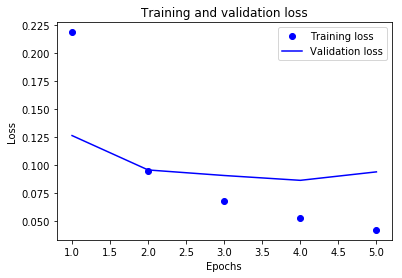

In [141]:
import matplotlib.pyplot as plt

acc = history.history['acc']
print(len(acc))
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The model quickly fit the training data. After ~4 epochs, the validation loss did not improve, but the training loss did. A sign of overfitting. However, these are still very small loss numbers so we can't read to much into them.

### Plot training accuracy and validation accuracy versus training epochs

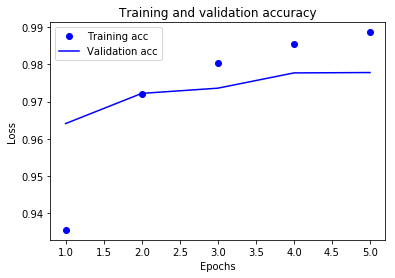

In [143]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The validation accuracy also does not improve after ~4 epochs.

#### Check held out test data

In [145]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 9504/10000 [===========================>..] - ETA: 0s

In [146]:
print('test_acc:', test_acc)

test_acc: 0.9794


#### Summary MLP

Test accuracy looks pretty good, but we can probably do a little better with a more complex model that does not overfit.


#### Convnet

Define Convnet consisting of a stack of `Conv2D` (with `relu` activation), `MaxPooling2D`, and `Dropout` layers.

The final convolution layer is flattend prior to feeding into a final dense layer, and finally a softmax output layer with sigmoid activation.

In [153]:
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

network = models.Sequential()
network.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D(pool_size=(2, 2)))
network.add(layers.Dropout(0.25))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(num_classes, activation='softmax'))

network.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = network.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = network.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 129s - loss: 0.3379 - acc: 0.8986 - val_loss: 0.0773 - val_acc: 0.9762
Epoch 2/12
60000/60000 [==============================] - 128s - loss: 0.1136 - acc: 0.9669 - val_loss: 0.0546 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 132s - loss: 0.0858 - acc: 0.9749 - val_loss: 0.0441 - val_acc: 0.9850
Epoch 4/12
60000/60000 [==============================] - 140s - loss: 0.0714 - acc: 0.9789 - val_loss: 0.0403 - val_acc: 0.9860
Epoch 5/12
60000/60000 [==============================] - 128s - loss: 0.0610 - acc: 0.9818 - val_loss: 0.0381 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 125s - loss: 0.0543 - acc: 0.9841 - val_loss: 0.0333 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 127s - loss: 0.0486 - acc: 0.9852 - val_loss:

12


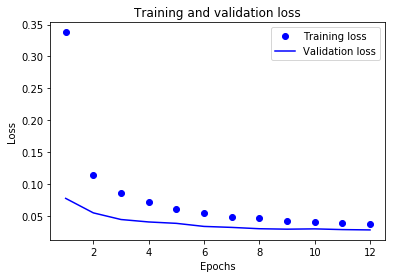

In [154]:
import matplotlib.pyplot as plt

acc = history.history['acc']
print(len(acc))
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

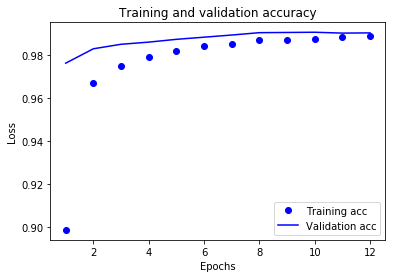

In [155]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()